Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 1.0


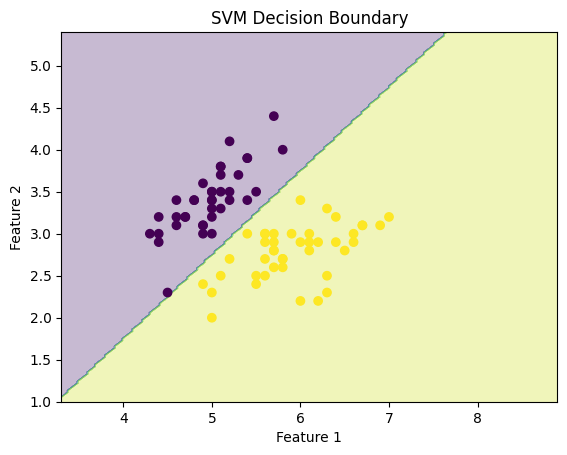

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
mask = y < 2
X, y = X[mask], y[mask]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
print("Linear Kernel Accuracy:",
      accuracy_score(y_test, svm_linear.predict(X_test)))
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
print("RBF Kernel Accuracy:",
      accuracy_score(y_test, svm_rbf.predict(X_test)))
X = iris.data
y = iris.target
svm_multi = SVC(kernel='rbf')
svm_multi.fit(X, y)
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary")
plt.show()
